In [1]:
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

# Reading the Image from Training data

In [2]:
train_data = pd.read_csv('/home/admin1/opencv/age-detection/train.csv')

In [3]:
train_data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


Age: MIDDLE


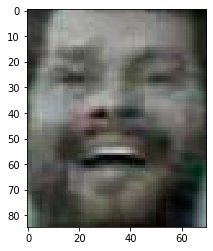

In [4]:
print('Age:', train_data.Class[0])
image = cv2.imread('/home/admin1/opencv/age-detection/Train/377.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Reading the Image from Test data

In [5]:
test_data = pd.read_csv('/home/admin1/opencv/age-detection/test.csv')

In [6]:
test_data.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


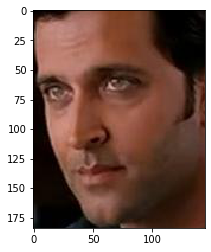

In [7]:
test_image = cv2.imread('/home/admin1/opencv/age-detection/Test/989.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

### Shape of all the Images are not the same

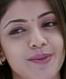

In [8]:
Image.open('/home/admin1/opencv/age-detection/Train/81.jpg')

In [9]:
Image.open('/home/admin1/opencv/age-detection/Train/59.jpg')

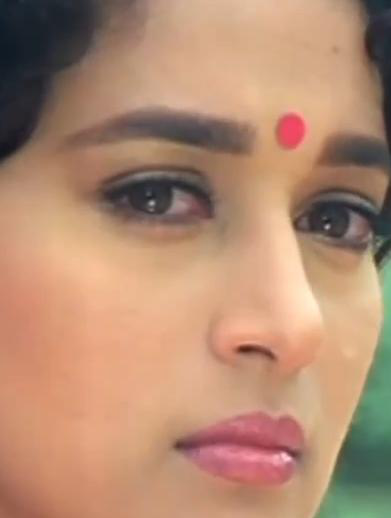

In [10]:
Image.open('/home/admin1/opencv/age-detection/Train/378.jpg')

# Handling variations in shape for train dataset

In [11]:
train_dir = '/home/admin1/opencv/age-detection/'

In [12]:
temp = []
for img_name in train_data['ID']:
    img_path = os.path.join(train_dir, 'Train', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(32,32), interpolation = cv2.INTER_CUBIC)
    img = img.astype('float32') 
    temp.append(img)

In [13]:
print('The Length of training data is', len(temp))

The Length of training data is 19906


In [14]:
temp[0]

array([[[ 47.,  46.,  49.],
        [ 41.,  40.,  42.],
        [ 43.,  44.,  42.],
        ...,
        [ 15.,  23.,  16.],
        [  3.,  11.,   4.],
        [  8.,  16.,   9.]],

       [[ 56.,  55.,  57.],
        [ 54.,  53.,  54.],
        [ 49.,  50.,  48.],
        ...,
        [ 36.,  43.,  38.],
        [ 19.,  26.,  22.],
        [ 21.,  28.,  23.]],

       [[ 59.,  61.,  62.],
        [ 59.,  61.,  61.],
        [ 62.,  64.,  64.],
        ...,
        [ 50.,  57.,  52.],
        [ 29.,  36.,  31.],
        [ 27.,  34.,  29.]],

       ...,

       [[135., 145., 131.],
        [ 80.,  89.,  77.],
        [ 44.,  51.,  44.],
        ...,
        [ 43.,  41.,  30.],
        [ 94.,  93.,  78.],
        [135., 135., 116.]],

       [[143., 155., 125.],
        [ 99., 109.,  87.],
        [ 62.,  70.,  60.],
        ...,
        [ 64.,  56.,  43.],
        [110., 103.,  88.],
        [150., 142., 127.]],

       [[136., 148., 120.],
        [ 95., 104.,  83.],
        [ 60.,  

In [15]:
x_train = np.stack(temp, axis = 0)

In [16]:
x_train.shape

(19906, 32, 32, 3)

# Handling Variations in shape for Test dataset

In [17]:
test_dir = '/home/admin1/opencv/age-detection/'

In [18]:
test_temp = []
for img_name in test_data['ID']:
    img_path = os.path.join(test_dir, 'Test', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(32,32), interpolation = cv2.INTER_CUBIC)
    img = img.astype('float32') 
    test_temp.append(img)

In [19]:
print('The Length of training data is', len(test_temp))

The Length of training data is 6636


In [20]:
test_temp[0]

array([[[ 18.,  21.,  26.],
        [ 17.,  22.,  26.],
        [ 18.,  23.,  25.],
        ...,
        [ 20.,  24.,  26.],
        [ 24.,  27.,  28.],
        [ 25.,  27.,  27.]],

       [[ 21.,  27.,  29.],
        [ 17.,  21.,  24.],
        [ 17.,  22.,  23.],
        ...,
        [  9.,  12.,  15.],
        [ 17.,  21.,  22.],
        [ 27.,  30.,  30.]],

       [[ 17.,  23.,  22.],
        [ 14.,  20.,  19.],
        [ 20.,  26.,  25.],
        ...,
        [ 12.,  14.,  19.],
        [ 19.,  22.,  24.],
        [ 24.,  29.,  28.]],

       ...,

       [[124., 131., 164.],
        [127., 134., 167.],
        [129., 136., 169.],
        ...,
        [  8.,  14.,  21.],
        [  8.,  14.,  18.],
        [  5.,  13.,  14.]],

       [[112., 119., 152.],
        [114., 121., 154.],
        [117., 124., 157.],
        ...,
        [  5.,  11.,  15.],
        [  5.,  13.,  14.],
        [ 10.,  17.,  16.]],

       [[ 99., 106., 139.],
        [103., 110., 143.],
        [111., 1

In [21]:
x_test = np.stack(test_temp, axis = 0)

In [22]:
x_test.shape

(6636, 32, 32, 3)

In [23]:
lb = LabelEncoder()
y_train = lb.fit_transform(train_data['Class'])
y_train = tf.keras.utils.to_categorical(y_train)

In [24]:
y_train.shape

(19906, 3)

# Initialising the CNN

In [25]:
model = tf.keras.Sequential()

# Convolution Layer and MaxPooling Layer

In [26]:
model.add(tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Convolution2D(filters = 40, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.5))

# Flattening

In [27]:
model.add(tf.keras.layers.Flatten())

# Fully Connected Layer

In [28]:
model.add(tf.keras.layers.Dense(units = 200, activation = 'relu'))

# Output Layer

In [29]:
model.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

# Compiling the model

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 40)        11560     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        11552     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0

# Fitting the CNN to the Images

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [33]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15924, 32, 32, 3), (3982, 32, 32, 3), (15924, 3), (3982, 3))

In [34]:
tensorboard = TensorBoard(log_dir = '/home/admin1/opencv/graph', 
                          histogram_freq = 0,
                          write_graph = False, 
                          write_images = False)

In [35]:
model.fit(x = X_train, 
          y = Y_train,
          batch_size = 20,
          epochs = 50,
         callbacks = [tensorboard])

Train on 15924 samples
Epoch 1/50
15924/15924 [==============================] - 23s 1ms/sample - loss: 1.0996 - accuracy: 0.5563
Epoch 2/50
15924/15924 [==============================] - 21s 1ms/sample - loss: 0.8767 - accuracy: 0.6070
Epoch 3/50
15924/15924 [==============================] - 20s 1ms/sample - loss: 0.8469 - accuracy: 0.6261
Epoch 4/50
15924/15924 [==============================] - 21s 1ms/sample - loss: 0.8347 - accuracy: 0.6325
Epoch 5/50
15924/15924 [==============================] - 21s 1ms/sample - loss: 0.8163 - accuracy: 0.6481
Epoch 6/50
15924/15924 [==============================] - 23s 1ms/sample - loss: 0.8084 - accuracy: 0.6523
Epoch 7/50
15924/15924 [==============================] - 23s 1ms/sample - loss: 0.7977 - accuracy: 0.6565
Epoch 8/50
15924/15924 [==============================] - 21s 1ms/sample - loss: 0.7858 - accuracy: 0.6621
Epoch 9/50
15924/15924 [==============================] - 17s 1ms/sample - loss: 0.7797 - accuracy: 0.6656
Epoch 10/50
15

In [36]:
y_pred =  model.predict_classes(X_test)

In [37]:
y_pred

array([0, 2, 0, ..., 0, 2, 1])

In [38]:
Y_test = np.argmax(Y_test, axis = 1)

In [39]:
Y_test

array([0, 0, 0, ..., 2, 2, 0])

In [40]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      2143
           1       0.57      0.43      0.49       480
           2       0.81      0.56      0.66      1359

    accuracy                           0.71      3982
   macro avg       0.69      0.62      0.64      3982
weighted avg       0.72      0.71      0.70      3982



In [41]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1875,  122,  146],
       [ 244,  207,   29],
       [ 567,   35,  757]])